In [7]:
import re
import regex
import pandas as pd
import numpy as np
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
import datetime
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline


In [15]:
def startWithDateAndTimeAndroid(s):
    pattern = '^([0-9]+)/(?:[0-9]+/)([0-9]+), ([0-9]+):([0-9]+)(?: (AM|PM|am|pm))? -'
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [16]:
def FindAuthor(s):
    s = s.split(":")
    if len(s) == 2:
        return True
    else:
        return False

In [23]:
def getDataPointAndroid(line):
    splitLine = line.split(' - ')
    dateTime = splitLine[0]
    date, time = dateTime.split(', ')
    message = ' '.join(splitLine[1:])
    if FindAuthor(message):
        splitMessage = message.split(':')
        author = splitMessage[0]
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

In [24]:
def split_count(text):

     emoji_list = []
     emojis_iter = map(lambda y:y, emoki.UNICODE_EMOJI['en'].keys())
     regex_set = re.compile('|'.join(re.escape(em) for em in emojis_iter))
     emoji_list = regex_set.findall(text)
     return emoji_list

In [25]:
parsedData = []
conversationPath = 'FSDS.txt'
with open(conversationPath, encoding="utf-8") as fp:
    device = ''
    first = fp.readline()
    print(first)
    if '[' in first:
        device = 'ios'
    else:
        device = "android"

    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        if device == 'ios':
            line = line.strip()
            if startWithDateandTimeios(line):
                if len(messageBuffer) > 0:
                    parsedData.append([date, time, author, ' '.join(messageBuffer)])
                messageBuffer.clear()
                date, time, author, message = getDataPointios(line)
                messageBuffer.append(message)
            else:
                line = (line.encode('ascii', 'ignore')).decode("utf-8")
                if startWithDateandTimeios(line):
                    if len(messageBuffer) > 0:
                        parsedData.append([date, time, author, ' '.join(messageBuffer)])
                    messageBuffer.clear()
                    date, time, author, message = getDataPointios(line)
                    messageBuffer.append(message)
                else:
                    messageBuffer.append(line)
        else:
            line = line.strip()
            if startWithDateAndTimeAndroid(line):
                if len(messageBuffer) > 0:
                    parsedData.append([date, time, author, ' '.join(messageBuffer)])
                messageBuffer.clear()
                date, time, author, message = getDataPointAndroid(line)
                messageBuffer.append(message)
            else:
                messageBuffer.append(line)                       

09/03/2023, 16:52 - Sujitha Sundaravadivel👩🏻 FSDS: Log Normal Distribution.pdf (file attached)



In [35]:
import pandas as pd
import re

if device == 'android':
    df = pd.DataFrame(parsedData, columns=['Date','Time','Author','Message'])
    
    df = df.dropna()

    URLPATTERN = r'(https?://\S+)'
    df['urlcount'] = df['Message'].str.count(URLPATTERN)

else:
    df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message'])
    df = df.dropna()
    df["Date"] = df["Date"].apply(dateconv)  # Assuming you have a function named dateconv for date conversion
    df["Date"] = pd.to_datetime(df["Date"], format='%d-%m-%Y')

    URLPATTERN = r'(https?://\S+)'
    df['urlcount'] = df['Message'].str.count(URLPATTERN)

    

In [36]:
df.head(20)

,Date,Time,Author,Message,urlcount
0,09/03/2023,16:52,Sujitha Sundaravadivel👩🏻 FSDS,Power Law Distribution.pdf (file attached) Po...,0
1,09/03/2023,16:52,Sujitha Sundaravadivel👩🏻 FSDS,Just to share.. people asking to share all no...,0
2,09/03/2023,16:53,+91 95318 81559,@918300047139 Thanks a lot,0
3,09/03/2023,17:01,+91 91822 79112,Thanks for sharing,0
4,09/03/2023,17:19,+91 83092 43793,@918300047139 Thank you,0
7,10/03/2023,12:01,+91 77180 39459,"<Media omitted> ""Hello, fellow data enthusias...",2
8,11/03/2023,08:06,+91 6207 130 664,Dashboard of ineuron is not opening in my sys...,0
9,11/03/2023,08:08,+91 81799 55489,It's working fine for me.,0
10,11/03/2023,08:08,+91 81799 55489,Might be an internet connectivity issue.,0
11,11/03/2023,08:09,+91 6207 130 664,Okkk.. It maybe,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, 0 to 351
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      247 non-null    object
 1   Time      247 non-null    object
 2   Author    247 non-null    object
 3   Message   247 non-null    object
 4   urlcount  247 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 11.6+ KB


In [38]:
 df.Author.unique()

array(['Sujitha Sundaravadivel👩🏻 FSDS', '+91 95318 81559',
       '+91 91822 79112', '+91 83092 43793', '+91 77180 39459',
       '+91 6207 130 664', '+91 81799 55489', '+91 70085 23938',
       '+1 (408) 816-4288', '+92 320 1241524', '+91 88793 16956',
       '+91 96199 56895', '+91 99680 48193', '+91 86983 78457',
       '+91 6299 295 344', '+91 78772 73088', '+91 72209 10735',
       '+91 96663 38739', '+91 99969 51422', '+91 80874 84291',
       '+91 90311 95226', '+91 77964 54255', '+1 (830) 357-0166',
       '+91 6206 587 820', '+91 96325 17767', '+91 91678 49233',
       '+91 99018 91141', '+91 89846 82467', '+91 70782 74543',
       '+91 88670 63690', '+39 388 329 4269', '+91 96245 17472',
       '+91 6201 418 882', '+91 97376 36406', '+91 97303 01970',
       '+91 82400 96871', '+91 92900 15122', '+91 6300 827 921',
       '+91 86087 88239', '+91 78744 55884', '+91 77090 76469',
       '+91 81607 11492', '+91 97638 71187', '+91 81692 99485',
       '+91 79012 45730', '+91 8745

In [40]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, 0 to 351
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      247 non-null    object
 1   Time      247 non-null    object
 2   Author    247 non-null    object
 3   Message   247 non-null    object
 4   urlcount  247 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 11.6+ KB


In [41]:
total_messages = df.shape[0]
print(total_messages)

247


In [42]:
media_messages = df[df['Message']=='<Media omitted>'].shape[0]
print(media_messages)

0


In [43]:
URLPATTERN = r'(https?: //\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)
print(links)

0


In [45]:
link_messages = df[df['urlcount']>0]
deleted_messages = df[(df["Message"] == "You deleted this message")| (df["Message"] == "This message was deleted.")]
media_messages_df = df[(df['Message'] == ' <Media omitted >')|(df['Message'] == 'image omitted')|(df['Message'] == 'video omitted')|(df['Message'] == 'sticker omitted')]
messages_df = df.drop(media_messages_df.index)
messages_df = messages_df.drop(deleted_messages.index)
messages_df = messages_df.drop(link_messages.index)

In [46]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, 0 to 351
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      247 non-null    object
 1   Time      247 non-null    object
 2   Author    247 non-null    object
 3   Message   247 non-null    object
 4   urlcount  247 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 11.6+ KB


In [47]:
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['word_count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df['MessageCount'] = 1

In [49]:
messages_df.head(10)

,Date,Time,Author,Message,urlcount,Letter_Count,word_count,MessageCount
0,09/03/2023,16:52,Sujitha Sundaravadivel👩🏻 FSDS,Power Law Distribution.pdf (file attached) Po...,0,70,9,1
1,09/03/2023,16:52,Sujitha Sundaravadivel👩🏻 FSDS,Just to share.. people asking to share all no...,0,50,10,1
2,09/03/2023,16:53,+91 95318 81559,@918300047139 Thanks a lot,0,27,5,1
3,09/03/2023,17:01,+91 91822 79112,Thanks for sharing,0,19,4,1
4,09/03/2023,17:19,+91 83092 43793,@918300047139 Thank you,0,25,5,1
7,10/03/2023,12:01,+91 77180 39459,"<Media omitted> ""Hello, fellow data enthusias...",0,539,80,1
8,11/03/2023,08:06,+91 6207 130 664,Dashboard of ineuron is not opening in my sys...,0,73,14,1
9,11/03/2023,08:08,+91 81799 55489,It's working fine for me.,0,26,6,1
10,11/03/2023,08:08,+91 81799 55489,Might be an internet connectivity issue.,0,41,7,1
11,11/03/2023,08:09,+91 6207 130 664,Okkk.. It maybe,0,16,4,1


In [50]:
frnds = messages_df.Author.unique()

for i in range(len(frnds)):
    req_df = messages_df[messages_df["Author"] == frnds[i]]

    print(f'Stats of {frnds[i]} -')

    print('Message Sent', req_df.shape[0])

    words_per_message = (np.sum(req_df['word_count']))/req_df.shape[0]
    print('Words per message', words_per_message)

    media = media_messages_df[media_messages_df['Author'] == frnds[i]].shape[0]
    print('Media Messages Sent',media)

    links = sum(link_messages[link_messages['Author'] == frnds[i]]["urlcount"])
    print('Link Sent',links)
    print()

Stats of Sujitha Sundaravadivel👩🏻 FSDS -
Message Sent 11
Words per message 8.272727272727273
Media Messages Sent 0
Link Sent 0

Stats of +91 95318 81559 -
Message Sent 1
Words per message 5.0
Media Messages Sent 0
Link Sent 0

Stats of +91 91822 79112 -
Message Sent 2
Words per message 8.0
Media Messages Sent 0
Link Sent 0

Stats of +91 83092 43793 -
Message Sent 5
Words per message 55.2
Media Messages Sent 0
Link Sent 0

Stats of +91 77180 39459 -
Message Sent 15
Words per message 41.2
Media Messages Sent 0
Link Sent 0

Stats of +91 6207 130 664 -
Message Sent 2
Words per message 9.0
Media Messages Sent 0
Link Sent 0

Stats of +91 81799 55489 -
Message Sent 14
Words per message 9.0
Media Messages Sent 0
Link Sent 0

Stats of +91 70085 23938 -
Message Sent 11
Words per message 6.454545454545454
Media Messages Sent 0
Link Sent 0

Stats of +1 (408) 816-4288 -
Message Sent 6
Words per message 16.833333333333332
Media Messages Sent 0
Link Sent 0

Stats of +92 320 1241524 -
Message Sent 19


Text(0, 0.5, 'No of Messages')

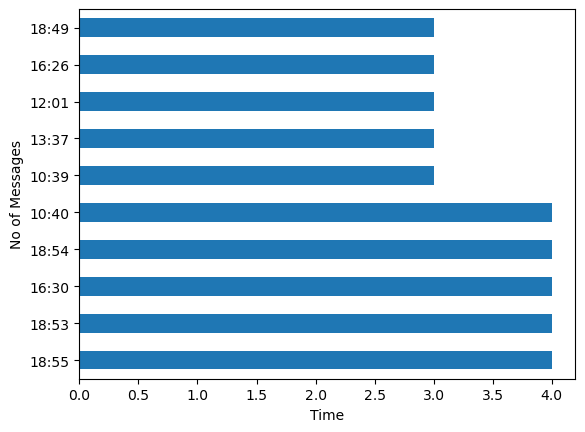

In [53]:
messages_df['Time'].value_counts().head(10).plot.barh()
plt.xlabel('Time')
plt.ylabel('No of Messages')

There are 19396 words in all the messages.


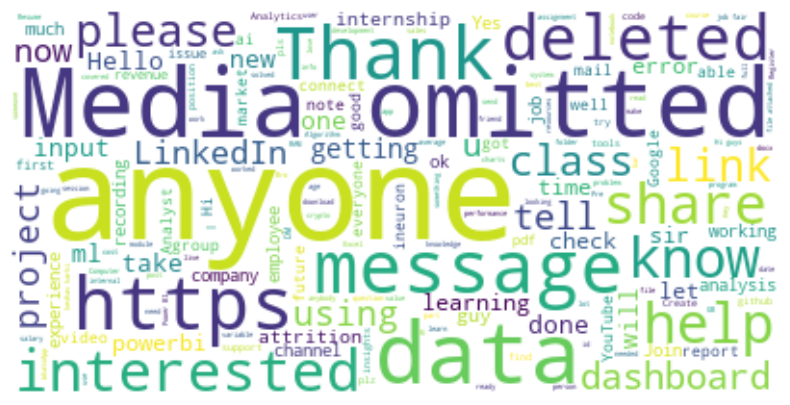

In [54]:
text = " ".join(review for review in messages_df.Message)
print("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords = stopwords, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Author name +1 (408) 816-4288


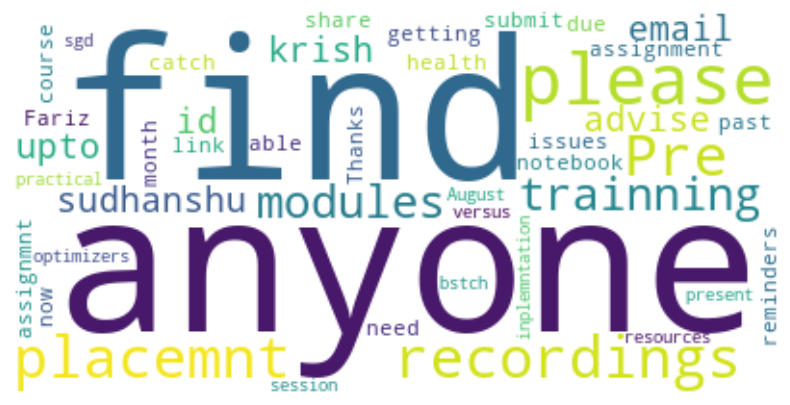

Author name +92 320 1241524


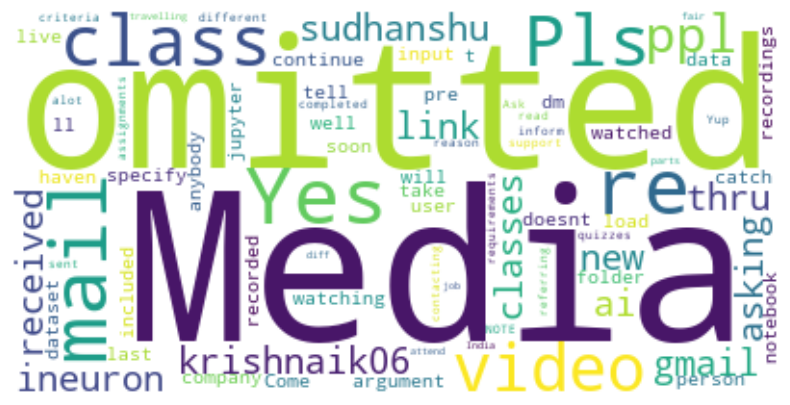

Author name +91 88793 16956


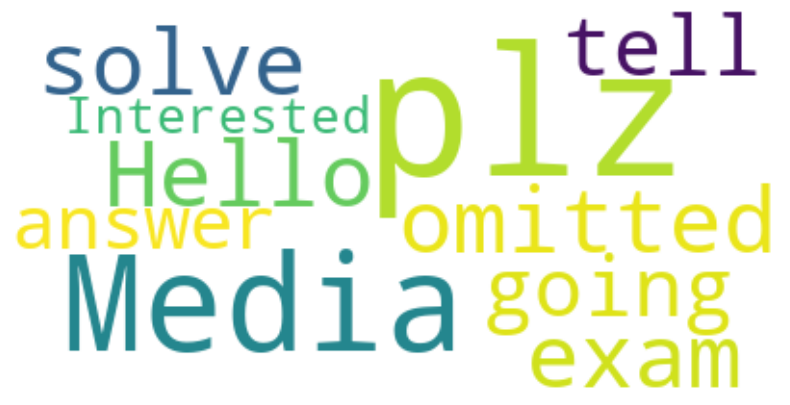

In [57]:
l = ['+1 (408) 816-4288', '+92 320 1241524', '+91 88793 16956']
for i in range(len(l)):
    dummy_df = messages_df[messages_df['Author'] == l[i]]
    text = " ".join(review for review in dummy_df.Message)
    stopwords = set(STOPWORDS)

    print('Author name',l[i])
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()